# Pairwise SIS approximation
This is the Python version of program 7.8 from page 285 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis, but this page has been significantly modified. In particular, it now compares the resulting epidemic curves from the pairwise approximation for SIS with the standard SIS modeles by couples ODEs.

In [2]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#parameters (time units are days)

n=4; #average number of contacts per individual
tau=0.1; #transmission probability between contacts
gamma=0.05; #recovery rate

#initial conditions
Y0=1.0; #initially one infected individual only
N0=10000; #total population
X0=N0-Y0 #initial susceptible population
XY0=n*Y0*X0/N0; #intial number of pairs healthy-infected individuals

ND=MaxTime=100.0; #number of days
TS=1.0 #time step


INPUT=np.hstack((X0,XY0))

In [5]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP   
	Y[0] = gamma*(N0-V[0]) - tau*V[1];
	Y[1] = tau*(n-1)*(n*V[0]-V[1])*V[1]/(n*V[0]) + gamma*(n*N0-n*V[0]-V[1]) - tau*V[1]\
	- tau*(n-1)*V[1]*V[1]/(n*V[0]) - gamma*V[1];
	return Y   # For odeint

In [6]:

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)
X = RES[:,0]
XY= RES[:,1]
Y=N0-X

In [11]:
#want to compare pairwise approximation with standard SIS
beta=n*tau
inp=(X0,Y0)

def diff_eqs_sis(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2))
	V = INP    
	Y[0] = - beta * V[0] * V[1]/N0 + gamma * V[1]
	Y[1] = beta * V[0] * V[1]/N0 - gamma * V[1]
	return Y   # For odeint

t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
res= spi.odeint(diff_eqs_sis,inp,t_range)

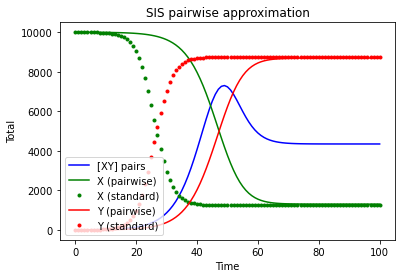

In [22]:
#Ploting
fig = plt.figure()
plt.plot(XY, '-b', label='[XY] pairs')
plt.plot(X,'-g',label='X (pairwise)')
plt.plot(res[:,0],'.g', label='X (standard)')
plt.plot(Y, '-r', label='Y (pairwise)')
plt.plot(res[:,1],'.r',label='Y (standard)')
plt.legend(loc='lower left')
plt.title('SIS pairwise approximation')
plt.xlabel('Time')
plt.ylabel('Total')
plt.show()
fig.savefig('SIS_pairwise_approx.pdf')